# Библиотека Pandas

## Data Frame (работа с таблицами)

In [14]:
import pandas as pd

In [40]:
frame = pd.DataFrame({'numbers':range(10), 'chars':['a']*10})

In [41]:
frame

,chars,numbers
0,a,0
1,a,1
2,a,2
3,a,3
4,a,4
5,a,5
6,a,6
7,a,7
8,a,8
9,a,9


In [42]:
frame = pd.read_csv('dataset.tsv',header=0,sep='\t')
frame

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер


In [26]:
print frame.columns, "\n", frame.shape

Index([u'Name', u'Birth', u'City', u'Position'], dtype='object') 
(6, 4)


In [43]:
new_line = {'Name':'Perov','Birth':'22.03.1990','City':'Penza'}
frame.append(new_line,ignore_index=True) # возвращаем копию

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер
6,Perov,22.03.1990,Penza,NaN


In [44]:
frame = frame.append(new_line,ignore_index=True) # возвращаем копию
frame['IsStudent']=[False]*5+[True]*2
frame

,Name,Birth,City,Position,IsStudent
0,Иванов А.А.,22.03.1980,Москва,NaN,False
1,Сорокин И.В.,07.08.1965,Волгоград,инженер,False
2,Белов М.М.,13.02.1980,Ростов,менеджер,False
3,Мельникова Д.С.,15.04.1985,Ростов,NaN,False
4,Рыбина Е.П.,19.11.1985,Москва,инженер,False
5,Костров С.О.,31.05.1985,Москва,стажер,True
6,Perov,22.03.1990,Penza,NaN,True


In [45]:
frame.drop([5,6], axis=0, inplace=True)
# делаем замену у исходного frame'а (in-place)

In [46]:
frame

,Name,Birth,City,Position,IsStudent
0,Иванов А.А.,22.03.1980,Москва,NaN,False
1,Сорокин И.В.,07.08.1965,Волгоград,инженер,False
2,Белов М.М.,13.02.1980,Ростов,менеджер,False
3,Мельникова Д.С.,15.04.1985,Ростов,NaN,False
4,Рыбина Е.П.,19.11.1985,Москва,инженер,False


In [47]:
frame.drop('IsStudent', axis=1, inplace=True)
frame

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер


In [55]:
frame.to_csv('updated_dataset.csv', sep=',', header=True, index=None)

In [65]:
%%cmd
chcp 65001

Microsoft Windows [Version 10.0.10586]
(c) 2015 Microsoft Corporation. All rights reserved.

C:\code\anaconda\lectures>chcp 65001
Active code page: 65001

C:\code\anaconda\lectures>

In [72]:
%%cmd
cat updated_dataset.csv

Microsoft Windows [Version 10.0.10586]
(c) 2015 Microsoft Corporation. All rights reserved.

C:\code\anaconda\lectures>cat updated_dataset.csv
Name,Birth,City,Position
Иванов А.А.,22.03.1980,Москва,
Сорокин И.В.,07.08.1965,Волгоград,инженер
Белов М.М.,13.02.1980,Ростов,менеджер
Мельникова Д.С.,15.04.1985,Ростов,
Рыбина Е.П.,19.11.1985,Москва,инженер

C:\code\anaconda\lectures>

# Индексация и селекция

In [76]:
frame=pd.read_csv('dataset.tsv',sep='\t',header=0)
frame

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер


In [77]:
frame.dtypes

Name        object
Birth       object
City        object
Position    object
dtype: object

In [80]:
frame.Birth = frame.Birth.apply(pd.to_datetime)
frame.dtypes

Name                object
Birth       datetime64[ns]
City                object
Position            object
dtype: object

In [84]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 4 columns):
Name        6 non-null object
Birth       6 non-null datetime64[ns]
City        6 non-null object
Position    4 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 240.0+ bytes


In [87]:
frame.fillna('разнорабочий', inplace=True) #заполнить все пропуски
frame

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,разнорабочий
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


In [89]:
frame.Position # выводиться как Series

0    разнорабочий
1         инженер
2        менеджер
3    разнорабочий
4         инженер
5          стажер
Name: Position, dtype: object

In [94]:
frame[['Name','Position']] # вывести под-таблицу

,Name,Position
0,Иванов А.А.,разнорабочий
1,Сорокин И.В.,инженер
2,Белов М.М.,менеджер
3,Мельникова Д.С.,разнорабочий
4,Рыбина Е.П.,инженер
5,Костров С.О.,стажер


In [96]:
frame.head(3)  # первые 3 строки

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,разнорабочий
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер


In [99]:
frame[:1]

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,разнорабочий


In [100]:
frame.loc[[1,3,5],['Name','City']]

,Name,City
1,Сорокин И.В.,Волгоград
3,Мельникова Д.С.,Ростов
5,Костров С.О.,Москва


In [106]:
# обращение по позиции осей
frame.iloc([1,3,5], [0,2])

In [109]:
frame.ix([1,3,5],[0,2]) # ix поддерживает обе нотации

In [111]:
# Фильтрация data frame по дате рождения
frame[frame.Birth >= pd.datetime(1985,1,1)] # логический индекс

,Name,Birth,City,Position
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


In [112]:
# выберем сотрудников не из Москвы
frame[(frame.Birth >= pd.datetime(1985,1,1)) & (frame.City!='Москва')]

,Name,Birth,City,Position
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий


# NumPy (работа с массивами)

In [114]:
import numpy as np

In [116]:
x = [2, 3, 4, 6]
y = np.array(x)
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [122]:
print x[1:3]
print y[1:3]
print
# print x[[0,2]] - не работает
print y[[0,2]]
print
print y[y>3]
print
print x*5 # 5 раз повторяет один и тот же массив
print y*5
print
# print x**5 - не работает
print y**5

[3, 4]
[3 4]

[2 4]

[4 6]

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]
[10 15 20 30]

[  32  243 1024 7776]


In [123]:
matrix = [[1,2,4], [3,1,0]]
nd_array = np.array(matrix)
print matrix[1][2]
print nd_array[1][2]
print nd_array[1,2]

0
0
0


In [125]:
print np.random.rand()
print np.random.randn()
print np.random.randn(2, 2) # матрица случайных чисел

0.644107590158
1.31715916929
[[ 0.8517981   0.27254497]
 [-1.48057738 -0.91252451]]


In [126]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [127]:
%timeit np.arange(0, 10000)
%timeit range(0,10000)

10000 loops, best of 3: 35.6 µs per loop
The slowest run took 6.05 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 300 µs per loop


# SciPy (решение мат. задач)

In [130]:
from scipy import optimize

$$ f(x,y) = (x-3.2)^2+(y-0.1)^2+3 $$

In [131]:
def f(x):
    return (x[0]-3.2) ** 2 +(x[1]-0.1)**2+3

print f([3.2, 0.1])

3.0


In [134]:
x_min = optimize.minimize(f, [5,5])
print x_min
print x_min.x #координата точки

      fun: 3.0000000000000058
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ -1.49011612e-07,   5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([ 3.19999993,  0.10000002])
[ 3.19999993  0.10000002]


In [135]:
from scipy import linalg

$ Ax=b $

In [140]:
A = np.array([[3,2,0], [1,-1,0], [0,5,1]])
b = np.array([2, 4, -1])

x = linalg.solve(A,b)
print x
print np.dot(A,x)==b # проверка решения

[ 2. -2.  9.]
[ True  True  True]


In [1]:
# Сингулярное разложение
X = np.random.randn(4,3)  # случ. матрица 4x3
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

NameError: name 'np' is not defined

# Matplotlib

In [2]:
%matplotlib inline

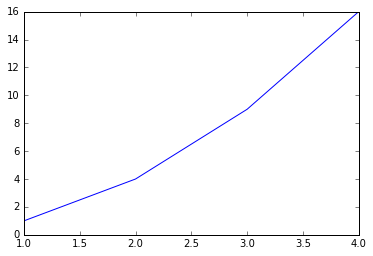

In [3]:
from matplotlib import pylab as plt

plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

# Всё вместе

In [6]:
%matplotlib inline
import numpy as np # работа с массивами
import matplotlib.pyplot as plt # построение графиков
from scipy import interpolate # интерполяция

In [7]:
# зашумленная экспонента => интерполяция не восст-т зависимость
x = np.arange(0,10,2)
y = np.exp(-x/3.0) + np.random.randn(len(x))*0.05
print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.05219737  0.49361827  0.28263481  0.13495919  0.03884616]


In [10]:
f = interpolate.interp1d(x,y, kind='quadratic')
xnew=np.arange(0,8,0.1)
ynew=f(xnew)

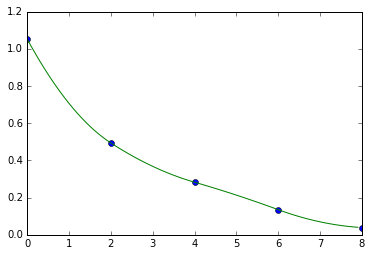

In [11]:
plt.plot(x,y,'o',xnew,ynew,'-')
plt.show()

# Оптимизация в SciPy

In [13]:
from scipy import optimize

In [14]:
def f(x):   # The rosenbrock function
    return .5*(1-x[0])**2+(x[1]-x[0]**2)**2

print f([1,1])

0.0


In [15]:
result=optimize.brute(f, ((-5,5),(-5,5)))
print result

[ 0.99999324  1.00001283]


In [18]:
# генетический алгоритм
print optimize.differential_evolution(f, ((-5,5),(-5,5)))

     fun: 1.2532462724504665e-19
 message: 'Optimization terminated successfully.'
    nfev: 2013
     nit: 66
 success: True
       x: array([ 1.,  1.])


In [24]:
# градиентный метод
import numpy as np

def g(x):
    return np.array(((-2*.5*(1-x[0])-4*x[0]*(x[1]-x[0]**2)),
                    2*(x[1]-x[0]**2)))

In [25]:
print optimize.check_grad(f,g,[2,2])

2.38418579102e-07


In [29]:
# fprime - передает градиент
print optimize.fmin_bfgs(f,[2,2],fprime=g)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 24
         Gradient evaluations: 24
[ 1.00000017  1.00000026]


In [30]:
# для хороших ф-ций будет использован по умолчанию BFGS
print optimize.minimize(f, [2,2])
print
print optimize.minimize(f, [2,2],method='BFGS',jac=g)
print
print optimize.minimize(f, [2,2],method='Nelder-Mead')

      fun: 9.538460152507302e-15
 hess_inv: array([[ 0.98632001,  1.97824278],
       [ 1.97824278,  4.46512261]])
      jac: array([  4.74186475e-07,  -1.53939058e-07])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([ 1.00000007,  1.00000005])

      fun: 1.9753570833042e-14
 hess_inv: array([[ 0.98632014,  1.97824322],
       [ 1.97824322,  4.46512386]])
      jac: array([  4.74186625e-07,  -1.53939016e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([ 1.00000017,  1.00000026])

 final_simplex: (array([[ 0.99998568,  0.99996682],
       [ 1.00002149,  1.00004744],
       [ 1.0000088 ,  1.00003552]]), array([  1.23119954e-10,   2.50768082e-10,   3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
      